# today's challenges




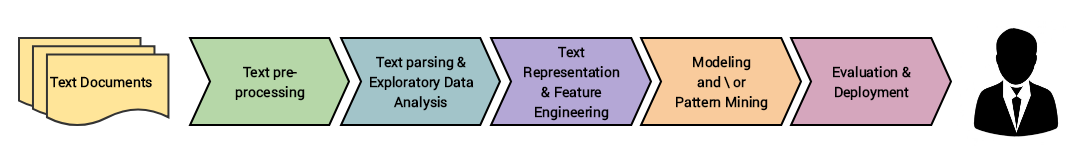

**Scraping News Articles for Data Retrieval**

We will be scraping inshorts, the website, by leveraging python to retrieve news articles. We will be focusing on articles on technology, sports and world affairs. We will retrieve one page’s worth of articles for each category. A typical news category landing page is depicted in the following figure, which also highlights the HTML section for the textual content of each article.



```
# https://inshorts.com/en/read
```



In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
seed_urls = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        news_articles = [{'news_headline': headline.find('span', 
                                                         attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', 
                                                       attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', 
                                               class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', 
                                               class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
        
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

In [4]:
news_df = build_dataset(seed_urls)
news_df.head()

,news_headline,news_article,news_category
0,Govt to bring bill to ban pvt cryptos with som...,Cryptocurrency Bill is among the 26 bills to b...,technology
1,Elon Musk sells over half of 10% Tesla stock h...,World's richest person Elon Musk has now sold ...,technology
2,Tesla fans flood JPMorgan's Yelp with '1-star'...,Tesla fans flooded JPMorgan Chase's Yelp page ...,technology
3,6G technology launch likely by 2023-end or 202...,India is working towards an indigenously devel...,technology
4,NASA launches 1st mission to crash spacecraft ...,Launching a mission to crash a spacecraft into...,technology


In [5]:
news_df.news_category.value_counts()


world         25
sports        25
technology    24
Name: news_category, dtype: int64

In [6]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 952 kB 48.4 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 6.0 MB 5.2 MB/s            
     |████████████████████████████████| 181 kB 51.5 MB/s            
     |████████████████████████████████| 628 kB 28.2 MB/s            
     |████████████████████████████████| 10.1 MB 68.0 MB/s            
     |████████████████████████████████| 42 kB 1.3 MB/s             
     |████████████████████████████████| 451 kB 36.0 MB/s            
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uni

In [16]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata

In [17]:
#SPACY
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')

#NLTK
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')


stopword_list.remove('no')
stopword_list.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Removing HTML tags**

Often, unstructured text contains a lot of noise, especially if you use techniques like web or screen scraping.

 HTML tags are typically one of these components which don’t add much value towards understanding and analyzing text.

In [18]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

**Removing Special Characters**

Special characters and symbols are usually non-alphanumeric characters or even occasionally numeric characters (depending on the problem), which add to the extra noise in unstructured text. 

Usually, simple regular expressions (regexes) can be used to remove them.

In [19]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("This is some important text! What do you think? 123#@!", 
                          remove_digits=True)

'This is some important text What do you think '

**Stemming**

To understand stemming, you need to gain some perspective on what word stems represent. Word stems are also known as the base form of a word, and we can create new words by attaching affixes to them in a process known as inflection. 

Consider the word JUMP. You can add affixes to it and form new words like JUMPS, JUMPED, and JUMPING. In this case, the base word JUMP is the word stem

In [20]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes")

'My system keep crash hi crash yesterday, our crash'

**Lemmatization**

Is very similar to stemming, where we remove word affixes to get to the base form of a word. However, the base form in this case is known as the root word, but not the root stem. 

The difference being that the root word is always a lexicographically correct word (present in the dictionary), but the root stem may not be so. 

Thus, root word, also known as the lemma, will always be present in the dictionary. (Both nltk and spacy have excellent lemmatizers)

 We will be using spacy here.

In [21]:

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing his crashed yesterday, ours crashes")

'my system keep crash his crashed yesterday , ours crash'

**Removing Stopwords**

Words which have little or no significance, especially when constructing meaningful features from text, are known as stopwords or stop words. These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. 

Typically, these can be articles, conjunctions, prepositions and so on. Some examples of stopwords are a, an, the, and the like.

In [22]:
tokenizer = ToktokTokenizer()

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("My system keeps crashing his crashed yesterday, ours crashes")

'system keeps crashing crashed yesterday , crashes'

**Bringing it all together — Building a Text Normalizer**

While we can definitely keep going with more techniques like correcting spelling, grammar and so on, let’s now bring everything we learnt together and chain these operations to build a text normalizer to pre-process text data.

In [23]:

def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

Let’s now put this function in action! We will first combine the news headline and the news article text together to form a document for each piece of news. Then, we will pre-process them.

In [24]:
# combining headline and article text
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

# pre-process text and store the same
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])

# show a sample news article
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'clean_text': 'elon musk sell half tesla stock vow offload twitter poll world rich person elon musk sell half tesla stock promise offload twitter user vote yes poll stake million share musk far offload million share worth billion sell share worth billion also exercise million stock option tuesday',
 'full_text': "Elon Musk sells over half of 10% Tesla stock he vowed to offload after Twitter poll. World's richest person Elon Musk has now sold over half of the Tesla stock he promised to offload after Twitter users voted 'yes' to his poll. Of the 10% stake or 17 million shares, Musk has so far offloaded 9.2 million shares worth $9.9 billion. He sold shares worth $1.05 billion and also exercised 2.15 million stock options on Tuesday."}

In [19]:
#if paolo wants his csv
#news_df.to_csv('news.csv', index=False, encoding='utf-8')

## Syntax and Structure

**Understanding Language Syntax and Structure**

For any language, syntax and structure usually go hand in hand, where a set of specific rules, conventions, and principles govern the way words are combined into phrases; phrases get combines into clauses; and clauses get combined into sentences. 

We will be talking specifically about the English language syntax and structure in this section. 

In English, words usually combine together to form other constituent units. 

These constituents include words, phrases, clauses, and sentences. 

**Considering a sentence**: *“The brown fox is quick and he is jumping over the lazy dog”*, it is made of a bunch of words and just looking at the words by themselves don’t tell us much

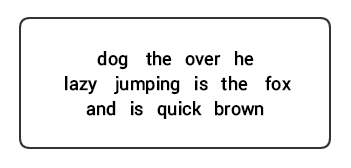

Knowledge about the structure and syntax of language is helpful in many areas like text processing, annotation, and parsing for further operations such as text classification or summarization. Typical parsing techniques for understanding text syntax are mentioned below.



*   Parts of Speech (POS) Tagging
*   Shallow Parsing or Chunking
*   Constituency Parsing
*   Dependency Parsing



We will be looking at all of these techniques.

Considering our previous example sentence *“The brown fox is quick and he is jumping over the lazy dog”*, if we were to annotate it using basic POS tags, it would look like the following figure

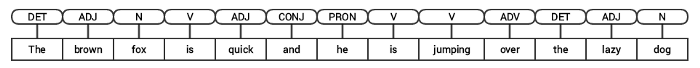

Thus, a sentence typically follows a hierarchical structure consisting the following components,


**sentence → clauses → phrases → words**

## Tagging Parts of Speech


Parts of speech (POS) are specific lexical categories to which words are assigned, based on their syntactic context and role. Usually, words can fall into one of the following major categories.



*   **N(oun):** This usually denotes words that depict some object or entity, which may be living or nonliving. Some examples would be fox , dog , book , and so on. The POS tag symbol for nouns is N.
*  **V(erb):** Verbs are words that are used to describe certain actions, states, or occurrences. There are a wide variety of further subcategories, such as auxiliary, reflexive, and transitive verbs (and many more). Some typical examples of verbs would be running , jumping , read , and write . The POS tag symbol for verbs is V.
*  **Adj(ective):** Adjectives are words used to describe or qualify other words, typically nouns and noun phrases. The phrase beautiful flower has the noun (N) flower which is described or qualified using the adjective (ADJ) beautiful . The POS tag symbol for adjectives is ADJ .
*  **Adv(erb):** Adverbs usually act as modifiers for other words including nouns, adjectives, verbs, or other adverbs. The phrase very beautiful flower has the adverb (ADV) very , which modifies the adjective (ADJ) beautiful , indicating the degree to which the flower is beautiful. The POS tag symbol for adverbs is ADV.



The process of classifying and labeling POS tags for words called parts of speech tagging or POS tagging . 

POS tags are used to annotate words and depict their POS, which is really helpful to perform specific analysis, such as narrowing down upon nouns and seeing which ones are the most prominent, word sense disambiguation, and grammar analysis. 

We will be leveraging both nltk and spacy which usually use the **Penn Treebank** notation for POS tagging.

In [26]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [28]:
# create a basic pre-processed corpus, don't lowercase to get POS context
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

# demo for POS tagging for sample news headline
sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])


,Word,POS tag,Tag type
0,Elon,NNP,PROPN
1,Musk,NNP,PROPN
2,sells,VBZ,VERB
3,over,IN,ADP
4,half,NN,NOUN
5,of,IN,ADP
6,10,CD,NUM
7,%,NN,NOUN
8,Tesla,NNP,PROPN
9,stock,NN,NOUN


In [29]:
# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,Elon,NNP
1,Musk,NNP
2,sells,VBZ
3,over,IN
4,half,NN
5,of,IN
6,10%,CD
7,Tesla,NNP
8,stock,NN
9,he,PRP


## Shallow Parsing or Chunking


Based on the hierarchy we depicted earlier, groups of words make up phrases. There are five major categories of phrases:



*   **Noun phrase (NP):** These are phrases where a noun acts as the head word. Noun phrases act as a subject or object to a verb.
Verb phrase (VP): These phrases are lexical units that have a verb acting as the head word. Usually, there are two forms of verb phrases. One form has the verb components as well as other entities such as nouns, adjectives, or adverbs as parts of the object.
*  **Adjective phrase (ADJP):** These are phrases with an adjective as the head word. Their main role is to describe or qualify nouns and pronouns in a sentence, and they will be either placed before or after the noun or pronoun.
*  **Adverb phrase (ADVP):** These phrases act like adverbs since the adverb acts as the head word in the phrase. Adverb phrases are used as modifiers for nouns, verbs, or adverbs themselves by providing further details that describe or qualify them.
*  **Prepositional phrase (PP):** These phrases usually contain a preposition as the head word and other lexical components like nouns, pronouns, and so on. These act like an adjective or adverb describing other words or phrases.

Shallow parsing, also known as light parsing or chunking , is a popular natural language processing technique of analyzing the structure of a sentence to break it down into its smallest constituents (which are tokens such as words) and group them together into higher-level phrases. 
This includes POS tags as well as phrases from a sentence.

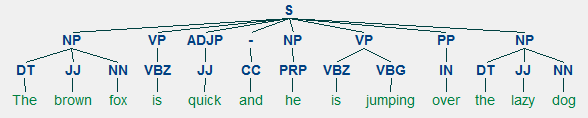

We will leverage the conll2000 corpus for training our shallow parser model. 

This corpus is available in nltk with chunk annotations and we will be using around 10K records for training our model. 

A sample annotated sentence is depicted as follows.

In [30]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.


True

In [31]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1]) 

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


From the preceding output, you can see that our data points are sentences that are already annotated with phrases and POS tags metadata that will be useful in training our shallow parser model. 

We will leverage two chunking utility functions, tree2conlltags , to get triples of word, tag, and chunk tags for each token, and conlltags2tree to generate a parse tree from these token triples. 

We will be using these functions to train our parser. A sample is depicted below.

In [32]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[1])
wtc

[('Chancellor', 'NNP', 'O'),
 ('of', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('Exchequer', 'NNP', 'I-NP'),
 ('Nigel', 'NNP', 'B-NP'),
 ('Lawson', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('restated', 'VBN', 'I-NP'),
 ('commitment', 'NN', 'I-NP'),
 ('to', 'TO', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('firm', 'NN', 'I-NP'),
 ('monetary', 'JJ', 'I-NP'),
 ('policy', 'NN', 'I-NP'),
 ('has', 'VBZ', 'B-VP'),
 ('helped', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('prevent', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('freefall', 'NN', 'I-NP'),
 ('in', 'IN', 'B-PP'),
 ('sterling', 'NN', 'B-NP'),
 ('over', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('past', 'JJ', 'I-NP'),
 ('week', 'NN', 'I-NP'),
 ('.', '.', 'O')]

The chunk tags use the **IOB** format. 

This notation represents Inside, Outside, and Beginning. 

The **B**- prefix before a tag indicates it is the beginning of a chunk, and **I**- prefix indicates that it is inside a chunk. The **O** tag indicates that the token does not belong to any chunk. The B- tag is always used when there are subsequent tags of the same type following it without the presence of O tags between them.

We will now define a function *conll_tag_ chunks()* to extract POS and chunk tags from sentences with chunked annotations and a function called *combined_taggers()* to train multiple taggers with backoff taggers (e.g. unigram and bigram taggers)

In [33]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]


def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff 

We will now define a class *NGramTagChunker* that will take in tagged sentences as training input, get their (word, POS tag, Chunk tag) WTC triples, and train a BigramTagger with a UnigramTagger as the backoff tagger. 

We will also define a *parse()* function to perform shallow parsing on new sentences

The *UnigramTagger* , *BigramTagger* , and *TrigramTagger* are classes that inherit from the base class *NGramTagger* , which itself inherits from the *ContextTagger* class , which inherits from the *SequentialBackoffTagger* class .


We will use this class to train on the **conll2000** chunked train_data and evaluate the model performance on the test_data

In [35]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

# define the chunker class
class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)
  
# train chunker model  
ntc = NGramTagChunker(train_data)

# evaluate chunker model performance
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


In [36]:
chunk_tree = ntc.parse(nltk_pos_tagged)
print(chunk_tree)

(S
  (NP Elon/NNP Musk/NNP)
  (VP sells/VBZ)
  (PP over/IN)
  (NP half/NN)
  (PP of/IN)
  (NP 10%/CD Tesla/NNP stock/NN)
  (NP he/PRP)
  (VP vowed/VBD to/TO offload/VB)
  (PP after/IN)
  (NP Twitter/NNP poll/NN))


In [37]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 784 kB in 1s (1,005 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.9_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.9) ...
Setting up xvfb (2:1.19.6-1ubuntu4.9) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [38]:
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 37 not upgraded.
Need to get 14.1 MB of archives.
After this operation, 49.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-droid-fallback all 1:6.0.

Thus you can see it has identified two noun phrases (NP) and one verb phrase (VP) in the news article. Each word’s POS tags are also visible. We can also visualize this in the form of a tree as follows. 

You might need to install *ghostscript* in case nltk throws an error.

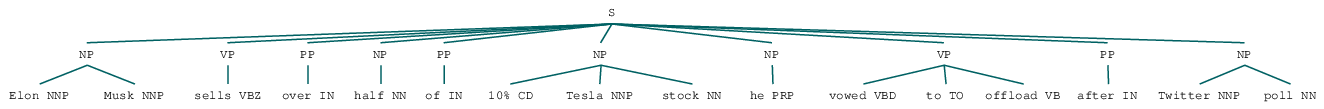

In [39]:
from IPython.display import display


display(chunk_tree)

## Constituency Parsing


Constituent-based grammars are used to analyze and determine the constituents of a sentence. These grammars can be used to model or represent the internal structure of sentences in terms of a hierarchically ordered structure of their constituents. Each and every word usually belongs to a specific lexical category in the case and forms the head word of different phrases. These phrases are formed based on rules called phrase structure rules.

Phrase structure rules form the core of constituency grammars, because they talk about syntax and rules that govern the hierarchy and ordering of the various constituents in the sentences. These rules cater to two things primarily.
*  They determine what words are used to construct the phrases or constituents.
*  They determine how we need to order these constituents together.

The generic representation of a phrase structure rule is **S → AB** , which depicts that the structure S consists of constituents A and B , and the ordering is A followed by B . 

The phrase structure rule denotes a binary division for a sentence or a clause as **S → NP VP** where **S** is the sentence or clause, and it is divided into the subject, denoted by the noun phrase (**NP**) and the predicate, denoted by the verb phrase (**VP**).

A constituency parser can be built based on such grammars/rules, which are usually collectively available as context-free grammar (CFG) or phrase-structured grammar. The parser will process input sentences according to these rules, and help in building a parse tree.

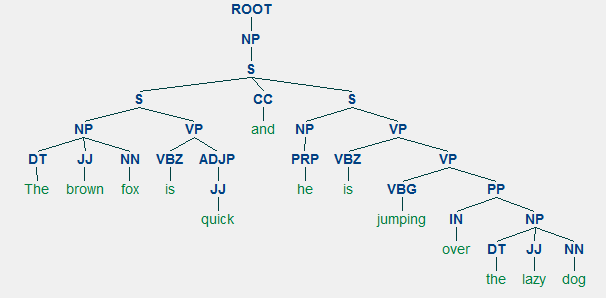

We will be using **nltk** and the **StanfordParser** here to generate parse trees.


In [40]:
#download and install parser
!pip install stanfordcorenlp
!wget http://nlp.stanford.edu/software/stanford-corenlp-full-2018-10-05.zip
!unzip stanford-corenlp-full-2018-10-05.zip

--2021-11-25 07:44:25--  http://nlp.stanford.edu/software/stanford-corenlp-full-2018-10-05.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/software/stanford-corenlp-full-2018-10-05.zip [following]
--2021-11-25 07:44:26--  https://nlp.stanford.edu/software/stanford-corenlp-full-2018-10-05.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-full-2018-10-05.zip [following]
--2021-11-25 07:44:26--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-full-2018-10-05.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... conn

The Stanford parser generally uses a **PCFG** (probabilistic context-free grammar) parser. 

A **PCFG** is a context-free grammar that associates a probability with each of its production rules. The probability of a parse tree generated from a **PCFG** is simply the production of the individual probabilities of the productions used to generate it.

In [41]:
from stanfordcorenlp import StanfordCoreNLP
import ast
import time


nlp = StanfordCoreNLP(r'./stanford-corenlp-full-2018-10-05')

result = nlp.parse("Hello, how are you?")

print(result)

(ROOT
  (S
    (INTJ (UH Hello))
    (, ,)
    (ADVP (WRB how))
    (VP (VBP are)
      (NP (PRP you)))
    (. ?)))


We can see the constituency parse tree for our news headline. Let’s visualize it to understand the structure better.

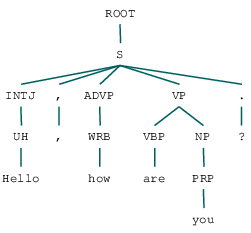

In [44]:
from nltk.tree import Tree
from nltk.draw.tree import TreeView
from IPython.display import display



tree = Tree.fromstring(result)
display(tree)

In [ ]:
import nltk 
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked","VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]

pattern = """NP: {<DT>?<JJ>*<NN>}
VBD: {<VBD>}
IN: {<IN>}"""
NPChunker = nltk.RegexpParser(pattern) 
result = NPChunker.parse(sentence)
result.draw()

We can see the nested hierarchical structure of the constituents in the preceding output as compared to the flat structure in shallow parsing. In case you are wondering what SINV means, it represents an Inverted declarative sentence, i.e. one in which the subject follows the tensed verb or modal. Refer to the Penn Treebank reference as needed to lookup other tags.

## Dependency Parsing


In dependency parsing, we try to use dependency-based grammars to analyze and infer both structure and semantic dependencies and relationships between tokens in a sentence. 

The basic principle behind a dependency grammar is that in any sentence in the language, all words except one, have some relationship or dependency on other words in the sentence. The word that has no dependency is called the root of the sentence. The verb is taken as the root of the sentence in most cases. 

All the other words are directly or indirectly linked to the root verb using links, which are the dependencies.

Considering our sentence *“The brown fox is quick and he is jumping over the lazy dog”*, if we wanted to draw the dependency syntax tree for this, we would have the structure

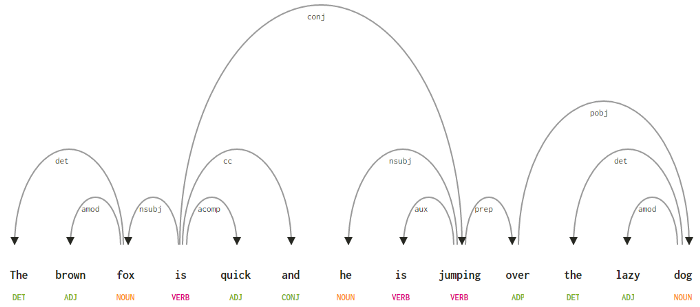

These dependency relationships each have their own meaning and are a part of a list of universal dependency types. This is discussed in an original paper, Universal Stanford Dependencies: A Cross-Linguistic Typology by de Marneffe et al, 2014) (https://nlp.stanford.edu/pubs/USD_LREC14_paper_camera_ready.pdf)

If we observe some of these dependencies, it is not too hard to understand them.

* The dependency tag **det** is pretty intuitive — it denotes the determiner relationship between a nominal head and the determiner. Usually, the word with POS tag DET will also have the det dependency tag relation. Examples include fox → the and dog → the.

* The dependency tag **amod** stands for adjectival modifier and stands for any adjective that modifies the meaning of a noun. Examples include fox → brown and dog → lazy.
* The dependency tag **nsubj** stands for an entity that acts as a subject or agent in a clause. Examples include is → fox and jumping → he.
The dependencies cc and conj have more to do with linkages related to words connected by coordinating conjunctions . Examples include is → and and is → jumping.
* The dependency tag **aux** indicates the auxiliary or secondary verb in the clause. Example: jumping → is.
* The dependency tag **acomp** stands for adjective complement and acts as the complement or object to a verb in the sentence. Example: is → quick
* The dependency tag **prep** denotes a prepositional modifier, which usually modifies the meaning of a noun, verb, adjective, or preposition. Usually, this representation is used for prepositions having a noun or noun phrase complement. Example: jumping → over.
* The dependency tag **pobj** is used to denote the object of a preposition . This is usually the head of a noun phrase following a preposition in the sentence. Example: over → dog.

Spacy had two types of English dependency parsers based on what language models you use, you can find more details here.

 Based on language models, you can use the Universal Dependencies Scheme or the CLEAR Style Dependency Scheme also available in NLP4J now. 
 
 We will now leverage spacy and print out the dependencies for each token in our news headline.

In [45]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---Elon[compound]--->[]
--------
['Elon']<---Musk[nsubj]--->[]
--------
['Musk']<---sells[ROOT]--->['stock']
--------
[]<---over[quantmod]--->[]
--------
['over']<---half[quantmod]--->[]
--------
[]<---of[quantmod]--->[]
--------
['half', 'of']<---10[nummod]--->[]
--------
['10']<---%[nmod]--->[]
--------
[]<---Tesla[compound]--->[]
--------
['%', 'Tesla']<---stock[dobj]--->['vowed']
--------
[]<---he[nsubj]--->[]
--------
['he']<---vowed[relcl]--->['offload']
--------
[]<---to[aux]--->[]
--------
['to']<---offload[xcomp]--->['after']
--------
[]<---after[prep]--->['poll']
--------
[]<---Twitter[compound]--->[]
--------
['Twitter']<---poll[pobj]--->[]
--------


It is evident that the verb beats is the ROOT since it doesn’t have any other dependencies as compared to the other tokens. For knowing more about each annotation you can always refer to the *CLEAR dependency scheme* (https://emorynlp.github.io/nlp4j/components/dependency-parsing.html). We can also visualize the above dependencies in a better way.

In [47]:
sentence_nlp

Elon Musk sells over half of 10% Tesla stock he vowed to offload after Twitter poll

In [46]:
from spacy import displacy



displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

## Named Entity Recognition


n any text document, there are particular terms that represent specific entities that are more informative and have a unique context. These entities are known as named entities , which more specifically refer to terms that represent real-world objects like people, places, organizations, and so on, which are often denoted by proper names. 

A naive approach could be to find these by looking at the noun phrases in text documents. 

Named entity recognition (NER) , also known as entity chunking/extraction , is a popular technique used in information extraction to identify and segment the named entities and classify or categorize them under various predefined classes.

SpaCy has some excellent capabilities for named entity recognition.

 Let’s try and use it on one of our sample news articles.

In [62]:
nlp = spacy.load("en_core_web_sm")


sentence = str(news_df.iloc[1].full_text)
sentence_nlp = nlp(sentence)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])


[(over, 'CARDINAL'), (half, 'CARDINAL'), (10, 'PERCENT'), (%, 'PERCENT'), (Twitter, 'PRODUCT'), (World, 'ORG'), (Elon, 'PERSON'), (Musk, 'PERSON'), (over, 'CARDINAL'), (half, 'CARDINAL'), (Tesla, 'ORG'), (Twitter, 'PRODUCT'), (10, 'PERCENT'), (%, 'PERCENT'), (17, 'CARDINAL'), (million, 'CARDINAL'), (Musk, 'PERSON'), (9.2, 'CARDINAL'), (million, 'CARDINAL'), ($, 'MONEY'), (9.9, 'MONEY'), (billion, 'MONEY'), ($, 'MONEY'), (1.05, 'MONEY'), (billion, 'MONEY'), (2.15, 'CARDINAL'), (million, 'CARDINAL'), (Tuesday, 'DATE')]


In [63]:
# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

We can clearly see that the major named entities have been identified by spacy. To understand more in detail about what each named entity means, you can refer to the documentation or check out the following table for convenience.

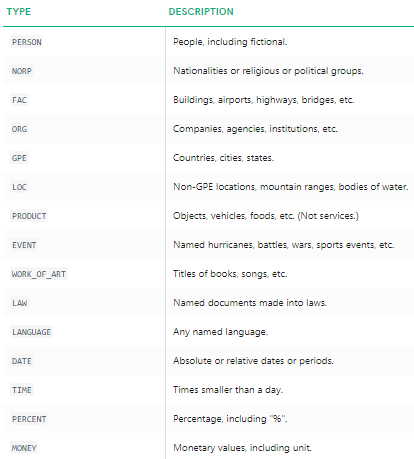

Let’s now find out the most frequent named entities in our news corpus!

For this, we will build out a data frame of all the named entities and their types using the following code.

In [67]:
nlp = spacy.load("en_core_web_sm")



named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [68]:
# get the top named entities
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,India,Wednesday,three,Shreyas Iyer,Apple,one,US,New Zealand,Tuesday,Afghanistan,UN,first,Pakistan,two,Kanpur
Entity Type,GPE,DATE,CARDINAL,PERSON,ORG,CARDINAL,GPE,GPE,DATE,GPE,ORG,ORDINAL,GPE,CARDINAL,PERSON
Frequency,31,9,8,7,7,7,6,6,6,6,5,5,5,5,4


In [69]:
# get the top named entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,PERSON,ORG,GPE,CARDINAL,DATE,NORP,ORDINAL,PERCENT,MONEY,LOC,WORK_OF_ART,PRODUCT,TIME,FAC,LAW
Frequency,173,132,128,85,77,47,20,13,11,6,5,4,3,3,2


## Emotion and Sentiment Analysis


Sentiment analysis is perhaps one of the most popular applications of NLP, with a vast number of tutorials, courses, and applications that focus on analyzing sentiments of diverse datasets ranging from corporate surveys to movie reviews. The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.

**Sentiment Analysis with AFINN Lexicon**

The AFINN lexicon is perhaps one of the simplest and most popular lexicons that can be used extensively for sentiment analysis. 

Developed and curated by Finn Årup Nielsen, you can find more details on this lexicon in the paper, “A new ANEW: evaluation of a word list for sentiment analysis in microblogs”, proceedings of the ESWC 2011 Workshop.

 The current version of the lexicon is AFINN-en-165. txt and it contains over 3,300+ words with a polarity score associated with each word. You can find this lexicon at the author’s official GitHub repository along with previous versions of it, including AFINN-111. 
 

In [71]:
!pip install afinn

     |████████████████████████████████| 52 kB 884 kB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=6c57c62d25109abfacb68c504bde71abf99339a6fdd9c0bd5208f6e562b3599d
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [72]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                  
                        count      mean       std   min    25%  50%   75%   max
news_category                                                                  
sports                   25.0  0.880000  7.731537 -20.0  -1.00  0.0  5.00  17.0
technology               24.0 -0.166667  4.779182 -10.0  -3.25  0.0  3.25   9.0
world                    25.0 -4.120000  8.348253 -21.0 -12.00 -1.0  1.00   8.0

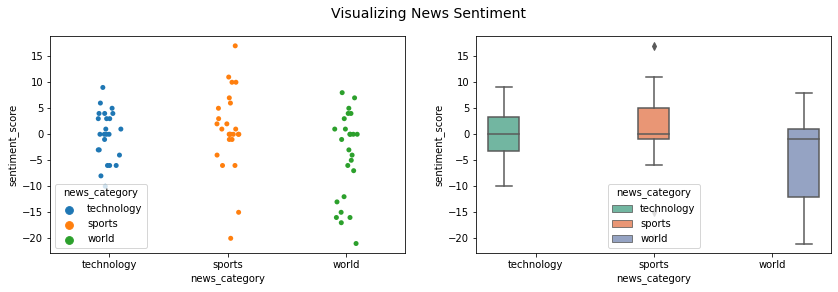

In [73]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


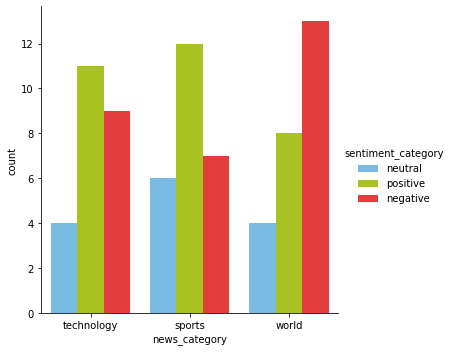

In [74]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

**Sentiment Analysis with TextBlob**

TextBlob is another excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also an a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. Typically, the scores have a normalized scale as compare to Afinn. The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. Let’s use this now to get the sentiment polarity and labels for each news article and aggregate the summary statistics per news category.

In [75]:

from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()
                                   

sentiment_score                     ...                       
                        count     mean       std  ...     50%     75%    max
news_category                                     ...                       
sports                   25.0  0.14480  0.174474  ...  0.1250  0.3220  0.525
technology               24.0  0.06775  0.139209  ...  0.0855  0.1505  0.307
world                    25.0  0.02240  0.174030  ...  0.0280  0.0860  0.397

[3 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


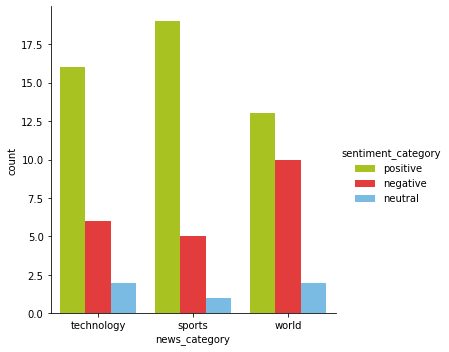

In [76]:

fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [61]:
%matplotlib inline


In [63]:
from nltk.tree import Tree
from nltk.draw.tree import TreeView


t = Tree.fromstring('(S (NP this tree) (VP (V is) (AdjP pretty)))')
TreeView(t)._cframe.print_to_file('output.ps')



In [65]:
import os
os.system('convert output.ps output.png')

32512